In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

In [81]:
dataset = pd.read_csv('./interm_daily_offers.csv')

In [82]:
dataset.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,delivery date,selling_price
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.00,1500.0,2021-07-01,854.00
1,2021-04-01,768.024839,30202938,25,Won,W,41,0.80,1210.0,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963,30,Won,WI,28,0.38,952.0,2021-01-01,644.33
3,2021-04-01,202.411065,30349574,32,Won,S,59,2.30,1317.0,2021-01-01,768.00
4,2021-04-01,785.526262,30211560,28,Won,W,10,4.00,2000.0,2021-03-01,577.00


### Preprocessing

In [83]:
df = dataset.copy()

In [84]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,delivery date,selling_price
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.00,1500.0,2021-07-01,854.00
1,2021-04-01,768.024839,30202938,25,Won,W,41,0.80,1210.0,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963,30,Won,WI,28,0.38,952.0,2021-01-01,644.33
3,2021-04-01,202.411065,30349574,32,Won,S,59,2.30,1317.0,2021-01-01,768.00
4,2021-04-01,785.526262,30211560,28,Won,W,10,4.00,2000.0,2021-03-01,577.00


In [85]:
df.dtypes

item_date         object
quantity tons    float64
customer           int64
country            int64
status            object
item type         object
application        int64
thickness        float64
width            float64
delivery date     object
selling_price    float64
dtype: object

In [86]:
df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])

In [87]:
df['item_date_year'] = df['item_date'].dt.year
df['item_date_week'] = df['item_date'].dt.week

df['delivery_date_year'] = df['delivery date'].dt.year
df['delivery_date_week'] = df['delivery date'].dt.week

In [88]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,delivery date,selling_price,item_date_year,item_date_week,delivery_date_year,delivery_date_week
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.00,1500.0,2021-07-01,854.00,2021,13,2021,26
1,2021-04-01,768.024839,30202938,25,Won,W,41,0.80,1210.0,2021-04-01,1047.00,2021,13,2021,13
2,2021-04-01,386.127949,30153963,30,Won,WI,28,0.38,952.0,2021-01-01,644.33,2021,13,2021,53
3,2021-04-01,202.411065,30349574,32,Won,S,59,2.30,1317.0,2021-01-01,768.00,2021,13,2021,53
4,2021-04-01,785.526262,30211560,28,Won,W,10,4.00,2000.0,2021-03-01,577.00,2021,13,2021,9


In [89]:
df.drop(['item_date','delivery date'], axis=1, inplace=True)

In [90]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,selling_price,item_date_year,item_date_week,delivery_date_year,delivery_date_week
0,54.151139,30156308,28,Won,W,10,2.00,1500.0,854.00,2021,13,2021,26
1,768.024839,30202938,25,Won,W,41,0.80,1210.0,1047.00,2021,13,2021,13
2,386.127949,30153963,30,Won,WI,28,0.38,952.0,644.33,2021,13,2021,53
3,202.411065,30349574,32,Won,S,59,2.30,1317.0,768.00,2021,13,2021,53
4,785.526262,30211560,28,Won,W,10,4.00,2000.0,577.00,2021,13,2021,9


<AxesSubplot:>

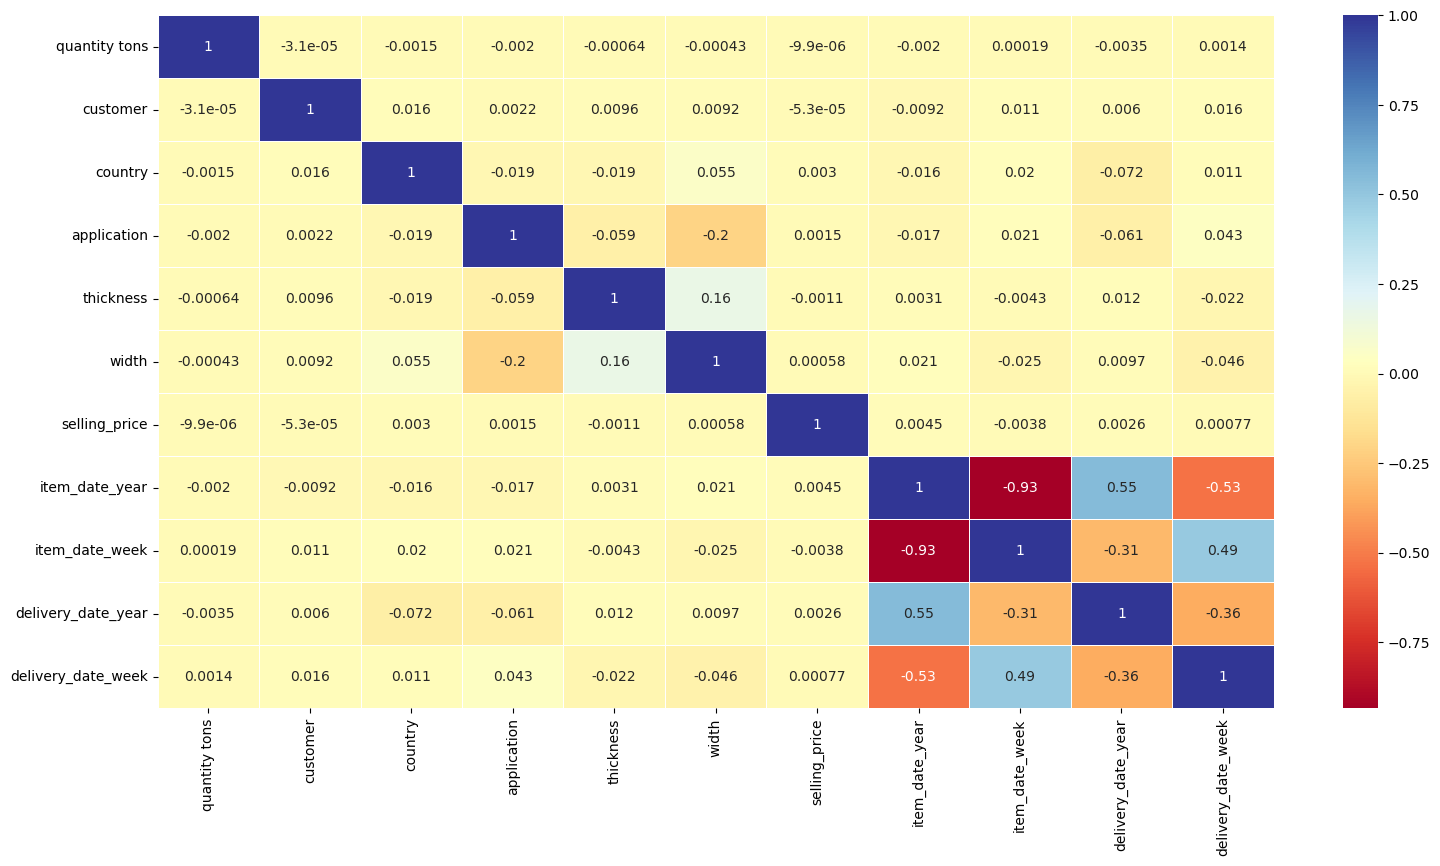

In [91]:
plt.figure(figsize = (18,9))
sns.heatmap(df.corr(),annot=True, cmap='RdYlBu',linewidths=0.5)

### The scores will be pretty bad with this correlation scores.. not much I can do with feature engineering too

In [92]:
df[df['item_date_year'] != df['delivery_date_year']]

,quantity tons,customer,country,status,item type,application,thickness,width,selling_price,item_date_year,item_date_week,delivery_date_year,delivery_date_week
2515,1076.477597,30344971,84,Lost,W,38,16.0,1255.0,1004.0,2021,13,2022,52
2519,1075.116415,30344971,84,Lost,W,38,12.0,1710.0,1001.0,2021,13,2022,52
2523,1084.605598,30344971,84,Lost,W,38,16.0,975.0,1015.0,2021,13,2022,52
3229,1080.035109,30196886,84,Lost,W,10,16.0,1255.0,1003.0,2021,13,2022,52
3231,1075.110061,30196886,84,Lost,W,10,12.0,1710.0,1002.0,2021,13,2022,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179263,195.039179,30301433,25,Won,W,66,5.0,1516.0,535.0,2020,28,2021,53
179267,196.756180,30301433,25,Won,W,66,5.0,1316.0,543.0,2020,28,2021,53
179271,198.842349,30301433,25,Won,W,66,6.0,1516.0,541.0,2020,28,2021,53
179275,198.021373,30301433,25,Won,W,66,8.0,1516.0,558.0,2020,28,2021,53


In [93]:
# basic date transformations are done

In [94]:
# One-Hot status

df = pd.get_dummies(df, columns=['status'], drop_first=True)
df.head()

,quantity tons,customer,country,item type,application,thickness,width,selling_price,item_date_year,item_date_week,delivery_date_year,delivery_date_week,status_Lost,status_Not lost for AM,status_Offerable,status_Offered,status_Revised,status_To be approved,status_Won,status_Wonderful
0,54.151139,30156308,28,W,10,2.00,1500.0,854.00,2021,13,2021,26,0,0,0,0,0,0,1,0
1,768.024839,30202938,25,W,41,0.80,1210.0,1047.00,2021,13,2021,13,0,0,0,0,0,0,1,0
2,386.127949,30153963,30,WI,28,0.38,952.0,644.33,2021,13,2021,53,0,0,0,0,0,0,1,0
3,202.411065,30349574,32,S,59,2.30,1317.0,768.00,2021,13,2021,53,0,0,0,0,0,0,1,0
4,785.526262,30211560,28,W,10,4.00,2000.0,577.00,2021,13,2021,9,0,0,0,0,0,0,1,0


In [95]:
# One-Hot 

df = pd.get_dummies(df, columns=['item type'], drop_first=True)
df.head()

,quantity tons,customer,country,application,thickness,width,selling_price,item_date_year,item_date_week,delivery_date_year,delivery_date_week,status_Lost,status_Not lost for AM,status_Offerable,status_Offered,status_Revised,status_To be approved,status_Won,status_Wonderful,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,54.151139,30156308,28,10,2.00,1500.0,854.00,2021,13,2021,26,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,768.024839,30202938,25,41,0.80,1210.0,1047.00,2021,13,2021,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,386.127949,30153963,30,28,0.38,952.0,644.33,2021,13,2021,53,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,202.411065,30349574,32,59,2.30,1317.0,768.00,2021,13,2021,53,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,785.526262,30211560,28,10,4.00,2000.0,577.00,2021,13,2021,9,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [96]:
df.dtypes

quantity tons             float64
customer                    int64
country                     int64
application                 int64
thickness                 float64
width                     float64
selling_price             float64
item_date_year              int64
item_date_week              int64
delivery_date_year          int64
delivery_date_week          int64
status_Lost                 uint8
status_Not lost for AM      uint8
status_Offerable            uint8
status_Offered              uint8
status_Revised              uint8
status_To be approved       uint8
status_Won                  uint8
status_Wonderful            uint8
item type_Others            uint8
item type_PL                uint8
item type_S                 uint8
item type_SLAWR             uint8
item type_W                 uint8
item type_WI                uint8
dtype: object

In [97]:
df1 = df.copy()

In [98]:
df1

,quantity tons,customer,country,application,thickness,width,selling_price,item_date_year,item_date_week,delivery_date_year,delivery_date_week,status_Lost,status_Not lost for AM,status_Offerable,status_Offered,status_Revised,status_To be approved,status_Won,status_Wonderful,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,54.151139,30156308,28,10,2.00,1500.0,854.00,2021,13,2021,26,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,768.024839,30202938,25,41,0.80,1210.0,1047.00,2021,13,2021,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,386.127949,30153963,30,28,0.38,952.0,644.33,2021,13,2021,53,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,202.411065,30349574,32,59,2.30,1317.0,768.00,2021,13,2021,53,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,785.526262,30211560,28,10,4.00,2000.0,577.00,2021,13,2021,9,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854,25,41,0.96,1220.0,591.00,2020,27,2020,27,0,0,0,0,0,0,1,0,0,0,0,0,1,0
181669,208.086469,30200854,25,41,0.95,1500.0,589.00,2020,27,2020,27,0,0,0,0,0,0,1,0,0,0,0,0,1,0
181670,4.235594,30200854,25,41,0.71,1250.0,619.00,2020,27,2020,27,0,0,0,0,0,0,1,0,0,0,0,0,1,0
181671,30.365022,30200854,25,41,0.85,1250.0,601.00,2020,27,2020,27,0,0,0,0,0,0,1,0,0,0,0,0,1,0


# Training

In [100]:
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [101]:
X.head()

,quantity tons,customer,country,application,thickness,width,item_date_year,item_date_week,delivery_date_year,delivery_date_week,status_Lost,status_Not lost for AM,status_Offerable,status_Offered,status_Revised,status_To be approved,status_Won,status_Wonderful,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,54.151139,30156308,28,10,2.00,1500.0,2021,13,2021,26,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,768.024839,30202938,25,41,0.80,1210.0,2021,13,2021,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,386.127949,30153963,30,28,0.38,952.0,2021,13,2021,53,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,202.411065,30349574,32,59,2.30,1317.0,2021,13,2021,53,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,785.526262,30211560,28,10,4.00,2000.0,2021,13,2021,9,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [102]:
y.head()

0     854.00
1    1047.00
2     644.33
3     768.00
4     577.00
Name: selling_price, dtype: float64

## Models

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [103]:
# Adaboost Regressor

X = df.drop("selling_price", axis=1)
y = df["selling_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
ada.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = ada.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 219718.2152140857
R-squared: 0.05253567539877457


In [104]:
# Random Forest Regressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Testing Random Forest Regressor
random_forest_preds = rf.predict(X_test)

# Evaluating Random Forest Regressor performance
random_forest_mae = mean_absolute_error(y_test, random_forest_preds)
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_preds))
print("Random Forest Regressor MAE:", random_forest_mae)
print("Random Forest Regressor RMSE:", random_forest_rmse)
r2 = r2_score(y_test, random_forest_preds)
print("R-squared:", r2)

Random Forest Regressor MAE: 755.6991072299433
Random Forest Regressor RMSE: 103337.31264506948
R-squared: -46047.037946374454


In [105]:
# XGBoost Regressor

from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbm = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=400, max_depth=15, learning_rate=0.35)

gbm.fit(X_train, y_train)

gbm_train_preds = gbm.predict(X_test)

gbm_mae = mean_absolute_error(y_test, gbm_train_preds)
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_train_preds))
print("XG Regressor MAE:", gbm_mae)
print("XG Regressor RMSE:", gbm_rmse)
r2 = r2_score(y_test, gbm_train_preds)
print("R-squared:", r2)

XG Regressor MAE: 38.973291617919564
XG Regressor RMSE: 429.68846932506517
R-squared: 0.20383294489910975


In [113]:
# Hyperparameter tuning - XGB
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

parameters = {'max_depth': [2, 4, 6, 8, 10],
              'learning_rate': [0.01, 0.1, 1],
              'n_estimators': [50, 100, 200]}

grid_search = GridSearchCV(xgb_model, parameters, cv=5, n_jobs=-1)

grid_search.fit(X, y)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)